In [7]:
# Remember to upload optipaw_FINAL.csv

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Set options to display all unique values
# pd.set_option('display.max_rows', None)  # Display all rows
# pd.set_option('display.max_columns', None)  # Display all columns

# Load Optipaw Data
optipaw_data = pd.read_csv('optipaw_FINAL.csv')

# Extract rows where the 'State' column is 'Austin'
austin_data = optipaw_data[optipaw_data['State'] == 'Austin'].copy()

# Reset the index for the Austin data (optional but useful for clean DataFrames)
austin_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the extracted data
print(austin_data.head())

  Animal.ID    Name Animal.Type                        Breed            Sex  \
0   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
1   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
2   A047759    Oreo         Dog                    Dachshund  Neutered Male   
3   A134067  Bandit         Dog            Shetland Sheepdog  Neutered Male   
4   A141142  Bettie         Dog  Labrador Retriever/Pit Bull  Spayed Female   

          Color   Age      Intake.Type     Outcome.Type          Intake.Date  \
0  Yellow/White   7.0    Public Assist  Return to Owner  2014-12-19 10:21:00   
1  Yellow/White   6.0    Public Assist  Return to Owner  2014-03-07 14:26:00   
2      Tricolor  10.0  Owner Surrender         Transfer  2014-04-02 15:55:00   
3   Brown/White  16.0    Public Assist  Return to Owner  2013-11-16 09:02:00   
4   Black/White  15.0            Stray  Return to Owner  2013-11-16 14:46:00   

          Outcome.Date   State  
0  2014-12-

In [8]:
# Preprocessing Function for ML
def preprocessing(df, name_mapping_var=None):

  # For Name, we will use label encoding to assign each unique name a specific int, at the same time return the mapping
  # Strip leading asterisks from the Name column
  df['Name'] = df['Name'].str.lstrip('*')
  label_encoder = LabelEncoder()
  df['Name'] = label_encoder.fit_transform(df['Name'].astype(str))

  # If the user provided a variable to store the mapping, assign it
  if name_mapping_var is not None:
      name_mapping = {k: v for v, k in enumerate(label_encoder.classes_)}
      name_mapping_var.update(name_mapping)


  # For Animal.Type we will map Int Values to the specific animal type
  animal_mapping = {
    "Dog": 1, "Cat": 2, "Other": 3, "Bird": 4, "Livestock": 5,
    "House Rabbit": 6, "Rat": 7, "Ferret": 8, "Pig": 9, "Hamster": 10,
    "Guinea Pig": 11, "Gerbil": 12, "Hedgehog": 13, "Chinchilla": 14,
    "Goat": 15, "Mouse": 16, "Sugar Glider": 17, "Snake": 18,
    "Wildlife": 19, "Lizard": 20
    }

  df['Animal.Type'] = df['Animal.Type'].map(animal_mapping)

  # For Breed we will perform one hot encoding onto it
  # Remove parentheses and their contents, and replace '/' with space
  df['Breed'] = df['Breed'].str.replace(r'\(.*?\)', '', regex=True).str.replace('/', ' ').str.replace(',', ' ')

  # Split the 'Breed' column into a list and capitalize the first letter of each word
  df['Breed'] = df['Breed'].str.split().apply(lambda breeds: [breed.rstrip('-').capitalize() for breed in breeds])

  # Create dummy variables for each unique breed
  df_breeds = df['Breed'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded breed dataframe
  df = pd.concat([df, df_breeds], axis=1)

  # Drop the original 'Breed' column
  df = df.drop(columns=['Breed'])

  # For Sex we will map Int Values to specific Sex
  sex_mapping = {'Neutered Male': 1, 'Spayed Female': 2, 'Intact Female': 3, 'Intact Male': 4, 'Unknown': 5, 'Female': 6, 'Male': 7}

  # Map the Sex column using the defined mapping
  df['Sex'] = df['Sex'].map(sex_mapping)

  # For colours, we will split into individual colours and use one hot encoding, which is assigning binary values to it

  # Split the 'Color' column by '/', 'and', and ','
  df['Color'] = df['Color'].str.replace('/', ' ').str.replace('and', ' ').str.replace(',', ' ').str.replace(r'-\b', '', regex=True)

  # Split the 'Color' column into a list and capitalize the first letter of each word
  df['Color'] = df['Color'].str.split().apply(lambda colors: [color.capitalize() for color in colors])

  # Create dummy variables for each unique color
  df_colors = df['Color'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded color dataframe
  df = pd.concat([df, df_colors], axis=1)

  # Drop the original 'Color' column
  df = df.drop(columns=['Color'])

  # For Age, we will just store it as int and impute it with 0 if it is null, and store it as float
  df['Age'] = df['Age'].fillna(0).astype(float)

  # For Intake.Type, we will map Int Values to specific Intake
  intake_type_mapping = {
      'Public Assist': 1, 'Owner Surrender': 2, 'Stray': 3, 'Euthanasia Request': 4,
      'Abandoned': 5, 'Wildlife': 6, 'Moving': 7, 'Incompatible with owner lifestyle': 8,
      'Rabies Monitoring': 9, 'Marriage/Relationship split': 10, 'Owner Deceased': 11, 'Police Assist': 12,
      'Biting': 13, 'Owner Died': 14, 'TNR - Trap/Neuter/Release': 15, 'Unable to Afford': 16,
      'Unsuitable Accommodation': 17, 'Allergies': 18, 'Transfer from Other Shelter': 19,
      'Born in Shelter': 20, 'Landlord issues': 21, 'Litter relinquishment': 22, 'Sick/Injured': 23,
      'Owner requested Euthanasia': 24, 'Abuse/ neglect': 25, 'Incompatible with other pets': 26,
      'Behavioral Issues': 27, 'DOA': 28
  }

  # Map the Intake.Type column using the defined mapping
  df['Intake.Type'] = df['Intake.Type'].map(intake_type_mapping)

  # For Outcome.Type, we will map Int Values to specific Outcome
  outcome_type_mapping = {
      'Return to Owner': 1, 'Transfer': 2, 'Adoption': 3, 'Euthanasia': 4,
      'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7, 'Missing': 8,
      'Stolen': 9, 'Relocate': 10, 'Lost': 11, 'Foster': 12,
      'Reclaimed': 13, 'Escaped': 14, 'Released To Wild': 15
  }

  # Map the Outcome.Type column using the defined mapping
  df['Outcome.Type'] = df['Outcome.Type'].map(outcome_type_mapping)

  # For Date and Time, we will be using panda and numpy date conversion

  # Convert Intake.Date and Outcome.Date to datetime format
  df['Intake.Date'] = pd.to_datetime(df['Intake.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
  df['Outcome.Date'] = pd.to_datetime(df['Outcome.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


  # Extract date components from the date columns
  df['Intake.Day'] = df['Intake.Date'].dt.day.fillna(0).astype(int)
  df['Intake.Month'] = df['Intake.Date'].dt.month.fillna(0).astype(int)
  df['Intake.Year'] = df['Intake.Date'].dt.year.fillna(0).astype(int)

  df['Outcome.Day'] = df['Outcome.Date'].dt.day.fillna(0).astype(int)
  df['Outcome.Month'] = df['Outcome.Date'].dt.month.fillna(0).astype(int)
  df['Outcome.Year'] = df['Outcome.Date'].dt.year.fillna(0).astype(int)

  # Extract and convert the hour to radians
  df['Intake.Hour'] = df['Intake.Date'].dt.hour.fillna(0).astype(int)
  df['Outcome.Hour'] = df['Outcome.Date'].dt.hour.fillna(0).astype(int)

  df['Intake.Hour.Radians'] = (df['Intake.Hour'] / 24) * 2 * np.pi
  df['Outcome.Hour.Radians'] = (df['Outcome.Hour'] / 24) * 2 * np.pi

  # Drop original date columns if no longer needed
  df = df.drop(columns=['Intake.Date', 'Outcome.Date'])

  return df

# Process Austin Dataset (Animal ID and State to be removed later)
austin_data = preprocessing(austin_data)

print(austin_data.head())

  Animal.ID   Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type   State  \
0   A006100  19560            1    1   7.0            1             1  Austin   
1   A006100  19560            1    1   6.0            1             1  Austin   
2   A047759  16845            1    1  10.0            2             2  Austin   
3   A134067   4665            1    1  16.0            1             1  Austin   
4   A141142   5095            1    2  15.0            3             1  Austin   

   Abyssinian  Affenpinscher  ...  Intake.Day  Intake.Month  Intake.Year  \
0           0              0  ...          19            12         2014   
1           0              0  ...           7             3         2014   
2           0              0  ...           2             4         2014   
3           0              0  ...          16            11         2013   
4           0              0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour

In [9]:
# Splitting austin_data based on Outcome.Year
train_data = austin_data[austin_data['Outcome.Year'] < 2023].copy()
test_data = austin_data[austin_data['Outcome.Year'] >= 2023].copy()

# Reset the index for both datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop 'State' column from both train and test datasets
train_data = train_data.drop(columns=['State'])
test_data = test_data.drop(columns=['State'])

# Extract Animal.ID from the train_data and test_data
train_ids = train_data['Animal.ID']
test_ids = test_data['Animal.ID']

# Drop 'Animal.ID' from train_data and test_data
train_data = train_data.drop(columns=['Animal.ID'])
test_data = test_data.drop(columns=['Animal.ID'])

# # Output the result to verify the split
# print(train_data.head(5))
# print(test_data.head(5))

# print(train_ids.head(5))
# print(test_ids.head(5))

# print(train_data.shape)
# print(test_data.shape)

# Split dataset to x_train, y_train and x_test, y_test
x_train = train_data.drop(columns=['Outcome.Type'])
y_train = train_data['Outcome.Type']
train_id = train_ids

x_test = test_data.drop(columns=['Outcome.Type'])
y_test = test_data['Outcome.Type']
test_id = test_ids

# Generate y_test_df

y_test_df = pd.DataFrame({
    'Animal.ID': test_id.reset_index(drop=True),
    'Outcome.Type': y_test.reset_index(drop=True)  # No need for inverse mapping
})

print(y_test_df.head())

# Find the unique values of outcome type
print(sorted(y_test_df['Outcome.Type'].unique()))


  Animal.ID  Outcome.Type
0   A454956             1
1   A478575             1
2   A478962             3
3   A480389             1
4   A495162             7
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [10]:
# Reverse Mapping Function
# Outcome type mapping provided
outcome_type_mapping = {
    'Return to Owner': 1, 'Transfer': 2, 'Adoption': 3, 'Euthanasia': 4,
    'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7, 'Missing': 8,
    'Stolen': 9, 'Relocate': 10, 'Lost': 11, 'Foster': 12,
    'Reclaimed': 13, 'Escaped': 14, 'Released To Wild': 15
}

# Function to inverse Outcome.Type values based on the provided mapping
def inverse_outcome_type(df):
    # Create an inverse mapping from numbers to strings
    inverse_mapping = {v: k for k, v in outcome_type_mapping.items()}

    # Apply the mapping to the 'Outcome.Type' column
    df['Outcome.Type'] = df['Outcome.Type'].map(inverse_mapping)

    return df

y_test_df1 = y_test_df.copy()
y_test_df_inv = inverse_outcome_type(y_test_df)
print(y_test_df_inv.head())
print(sorted(y_test_df['Outcome.Type'].unique()))


  Animal.ID     Outcome.Type
0   A454956  Return to Owner
1   A478575  Return to Owner
2   A478962         Adoption
3   A480389  Return to Owner
4   A495162         Disposal
['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt', 'Stolen', 'Transfer']


In [11]:
# Helper functions to convert pred_df
import pandas as pd
# File Initialisation [File Chunk 1 with Same Format]
# nn = pd.read_csv('NNy_pred_df.csv', dtype={'Animal.ID': str})
# rf = pd.read_csv('RFy_pred_df.csv', dtype={'Animal.ID': str})
# rf_pca = pd.read_csv('RFPCAy_pred_df.csv', dtype={'Animal.ID': str})
# svm = pd.read_csv('SVMy_pred_df.csv', dtype={'Animal.ID': str})
# svm_pca = pd.read_csv('SVMPCAy_pred_df.csv', dtype={'Animal.ID': str})
xgb = pd.read_csv('XGBy_pred_df.csv', dtype={'Animal.ID': str})
# xgb_pca = pd.read_csv('XGBPCAy_pred_df.csv', dtype={'Animal.ID': str})


# Function to convert probability DataFrame into Outcome.Type
def get_predicted_outcome(df):
    # Find the column (outcome type) with the maximum probability for each row
    df['Outcome.Type'] = df.drop(columns=['Animal.ID']).idxmax(axis=1).astype(int)

    # Create a new DataFrame with only 'Animal.ID' and 'Outcome.Type'
    result_df = df[['Animal.ID', 'Outcome.Type']]

    return result_df

# nn = get_predicted_outcome(nn)
# rf = get_predicted_outcome(rf)
# rf_pca = get_predicted_outcome(rf_pca)
# svm = get_predicted_outcome(svm)
# svm_pca = get_predicted_outcome(svm_pca)
xgb = get_predicted_outcome(xgb)
# xgb_pca = get_predicted_outcome(xgb_pca)


# File Initialisation [File Chink 2 with Different Format]
# knn = pd.read_csv('y_pred_probs_knn_without_pca.csv', dtype={'Animal.ID': str})
# knn_pca = pd.read_csv('y_pred_probs_knn_with_pca.csv', dtype={'Animal.ID': str})
# lr = pd.read_csv('y_pred_probs_multilogreg_without_pca.csv', dtype={'Animal.ID': str})
# lr_pca = pd.read_csv('y_pred_probs_multilogreg_with_pca.csv', dtype={'Animal.ID': str})

# Define the function to extract and rename columns
def get_predicted_outcome2(df):
    # Check if the column 'Animal_ID' exists, otherwise assume it's 'Animal.ID'
    if 'Animal_ID' in df.columns:
        animal_id_col = 'Animal_ID'
    elif 'Animal.ID' in df.columns:
        animal_id_col = 'Animal.ID'

    # Select the appropriate 'Animal_ID'/'Animal.ID' and 'Predicted Class' columns and rename them
    return df[[animal_id_col, 'Predicted Class']].rename(columns={animal_id_col: 'Animal.ID', 'Predicted Class': 'Outcome.Type'})

# # Special Case for LR without PCA
# # Rename columns in the DataFrame x
# lr.rename(columns={
#     'Animal_ID': "Animal.ID",
#     'Probability of Return to Owner': '1',
#     'Probability of Transfer': '2',
#     'Probability of Adoption': '3',
#     'Probability of Euthanasia': '4',
#     'Probability of Died': '5',
#     'Probability of Rto-Adopt': '6',
#     'Probability of Disposal': '7',
#     'Probability of Missing': '8',
#     'Probability of Stolen': '9',
#     'Probability of Relocate': '10'
# }, inplace=True)


# lr = get_predicted_outcome(lr)
# lr_pca = get_predicted_outcome2(lr_pca)
# knn = get_predicted_outcome2(knn)
# knn_pca = get_predicted_outcome2(knn_pca)


# # Show the renamed DataFrame
# print(lr.head())
# print(lr_pca.head())
# print(knn.head())
# print(knn_pca.head())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6]
Outcome.Type
3     9817
2     2187
1     1340
4      243
6      185
5       72
7       31
8        4
11       2
9        1
10       1
Name: count, dtype: int64
Outcome.Type
3    10176
2     2227
1     1362
4      108
5        6
6        4
Name: count, dtype: int64


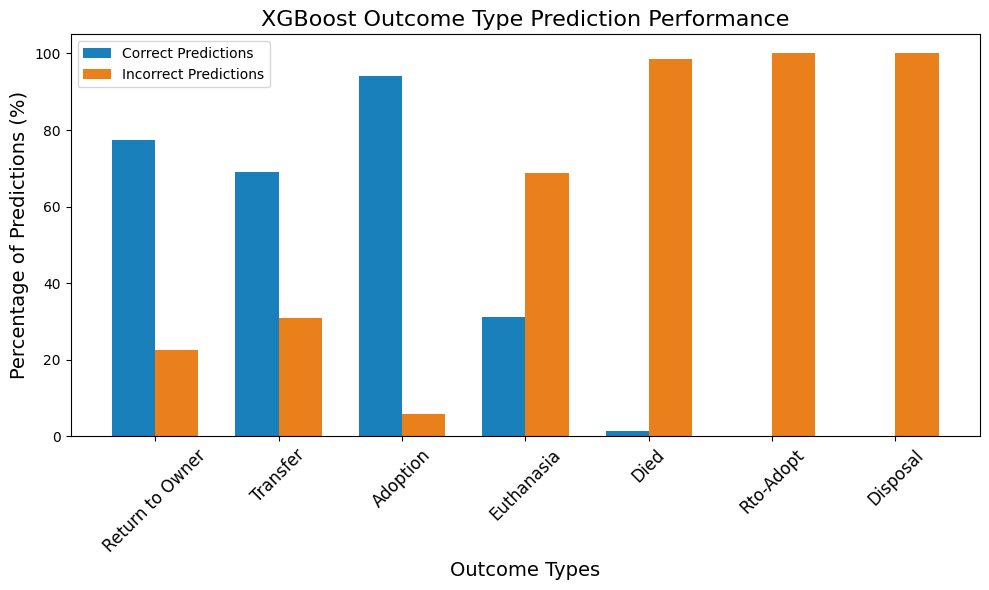

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping for outcome types (1 - 7)
outcome_type_mapping = {
    1: 'Return to Owner', 2: 'Transfer', 3: 'Adoption', 4: 'Euthanasia', 5: 'Died',
    6: 'Rto-Adopt', 7: 'Disposal'
}

def evaluate_predictions(y_test_df, y_pred_df, model_name="Model", save_path="performance.png"):
    # Categories of interest (1-7 only)
    categories = list(range(1, 8))  # 1 to 7 categories

    # Initialize counts for correct and incorrect predictions
    correct_predictions = {category: 0 for category in categories}
    incorrect_predictions = {category: 0 for category in categories}

    # Total number of predictions for each outcome in y_test (for percentage calculation)
    total_counts = y_test_df['Outcome.Type'].value_counts().to_dict()

    # Iterate through the test set and compare predictions (filter out predictions not in 1-7)
    for true_value, pred_value in zip(y_test_df['Outcome.Type'], y_pred_df['Outcome.Type']):
        if true_value in categories:
            if true_value == pred_value:
                correct_predictions[true_value] += 1
            else:
                incorrect_predictions[true_value] += 1

    # Convert counts to percentages for each outcome type
    correct_counts = [correct_predictions[i] / total_counts.get(i, 1) * 100 for i in categories]
    incorrect_counts = [incorrect_predictions[i] / total_counts.get(i, 1) * 100 for i in categories]

    # Data for bar plot
    labels = [outcome_type_mapping[i] for i in categories]

    # Plot
    bar_width = 0.35
    index = np.arange(len(categories))

    plt.figure(figsize=(10, 6))

    # Create side-by-side bars
    plt.bar(index - bar_width/2, correct_counts, bar_width, label='Correct Predictions', color='#1a80bb')
    plt.bar(index + bar_width/2, incorrect_counts, bar_width, label='Incorrect Predictions', color='#ea801c')

    plt.xlabel('Outcome Types', fontsize = 14)
    plt.ylabel('Percentage of Predictions (%)', fontsize = 14)
    plt.title(f'{model_name} Outcome Type Prediction Performance', fontsize = 16)
    plt.xticks(index, labels, rotation=45, fontsize = 12)
    plt.legend()

    # Ensure the layout is tight
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()





# Probability predicted correctly chart
y_test_df = y_test_df1.copy()
# Change this
y_pred_df = xgb.copy()

print(sorted(y_test_df['Outcome.Type'].unique()))
print(sorted(y_pred_df['Outcome.Type'].unique()))

print(y_test_df['Outcome.Type'].value_counts())
print(y_pred_df['Outcome.Type'].value_counts())




evaluate_predictions(y_test_df, y_pred_df, model_name="XGBoost", save_path="XGBoost_performance.png")